In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
import tensorflow as tf
import tensorflow.keras

from skimage import transform, io
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import os
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import cv2 # package name opencv
# version of Tensorflow
print(tf.__version__)
# To avoid Kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Segmentation Models: using `keras` framework.
2.15.0


In [2]:
img_dir = r'C:\Users\AVMI\Documents\Python Projects\VOCtrainval_11-May-2012\VOCdevkit\VOC2012' # Folder where images are stored
category1 = "Images"
path1 = os.path.join(img_dir, category1)

category2 = "SegmentationClass"
path2 = os.path.join(img_dir, category2)
class_num = 0
training_data_imgs = []
training_data_anns = []
IMG_Y_SIZE = 304 #152 #300 #150
IMG_X_SIZE = 304 #240 #480 #240


# Read the training images into the list 'training_data_imgs'
for img in os.listdir(path1):
    try:
        temp_array = cv2.imread(os.path.join(path1, img))
        temp_array1 = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(temp_array1, (IMG_X_SIZE, IMG_Y_SIZE))
        training_data_imgs.append(img_array) # add image and label to list
    except Exception as e:
        pass

    
# Read the annotated images into the list 'training_data_anns'

for img in os.listdir(path2):
    try:
        temp_array = cv2.imread(os.path.join(path2, img), cv2.IMREAD_UNCHANGED)
        temp_array1 = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)
        ann_array = cv2.resize(temp_array1, (IMG_X_SIZE, IMG_Y_SIZE))
        training_data_anns.append(ann_array) # add image and label to list
    except Exception as e:
        pass    




In [3]:
training_data_imgs[0].shape

(304, 304, 3)

In [4]:
img_array.shape

(304, 304, 3)

In [5]:
img_array[10][10] == (255,0,0)

array([ True, False, False])

In [6]:
r,g,b = img_array[10][10]
print(r,g,b)

255 255 255


In [7]:
training_data_imgs = np.array(training_data_imgs)
training_data_anns = np.array(training_data_anns)

In [8]:
#Class colors

Human = (192, 128, 128)    
Cow = (64, 128, 0)  
Horse = (192, 0, 128)
Animal = (128, 64, 0)
Dog = (64, 0, 128)
Cat = (64, 0, 0)
Bird = (128, 128, 0)

Train = (128, 192, 0)
Boat = (0, 0, 128)
Bike = (64, 128, 128)
Bicycle = (0, 128, 0)
Plane = (128, 0, 0)
Bus = (0, 128, 128)
Car = (128, 128, 128)

Chair = (192, 0, 0)
Couch = (0, 192, 0)
Table = (192, 128, 0)

Bottle = (128, 0, 128)

Computer_TV = (0, 64, 128)

Plant = (0, 64, 0)

Outline = (224, 224, 192)
Background = (0, 0, 0)


In [9]:
Human = np.array(Human)
Cow = np.array(Cow)
Horse = np.array(Horse)
Animal = np.array(Animal)
Dog = np.array(Dog)
Cat = np.array(Cat)
Bird = np.array(Bird)

Train = np.array(Train)
Boat = np.array(Boat)
Bike = np.array(Bike)
Bicycle = np.array(Bicycle)
Plane = np.array(Plane)
Bus = np.array(Bus)
Car = np.array(Car)

Chair = np.array(Chair)
Couch = np.array(Couch)
Table = np.array(Table)
Bottle = np.array(Bottle)
Computer_TV = np.array(Computer_TV)
Plant = np.array(Plant)
Outline = np.array(Outline)
Background = np.array(Background)

In [10]:
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    #label_seg = np.ones(label.shape,dtype=np.uint8)
    label_seg = np.full(label.shape, 0)
    label_seg [np.all(label==Human,axis=-1)] = 1
    label_seg [np.all(label==Cow,axis=-1)] = 2
    label_seg [np.all(label==Horse,axis=-1)] = 3
    label_seg [np.all(label==Animal,axis=-1)] = 4
    label_seg [np.all(label==Dog,axis=-1)] = 5
    label_seg [np.all(label==Cat,axis=-1)] = 6
    label_seg [np.all(label==Bird,axis=-1)] = 7
    label_seg [np.all(label==Train,axis=-1)] = 8
    label_seg [np.all(label==Boat,axis=-1)] = 9
    label_seg [np.all(label==Bike,axis=-1)] = 10
    label_seg [np.all(label==Bicycle,axis=-1)] = 11
    label_seg [np.all(label==Plane,axis=-1)] = 12
    label_seg [np.all(label==Bus,axis=-1)] = 13
    label_seg [np.all(label==Car,axis=-1)] = 14
    label_seg [np.all(label==Chair,axis=-1)] = 15
    label_seg [np.all(label==Couch,axis=-1)] = 16
    label_seg [np.all(label==Table,axis=-1)] = 17
    label_seg [np.all(label==Bottle,axis=-1)] = 18
    label_seg [np.all(label==Computer_TV,axis=-1)] = 19
    label_seg [np.all(label==Plant,axis=-1)] = 20
    label_seg [np.all(label==Outline,axis=-1)] = 21
    label_seg [np.all(label==Background,axis=-1)] = 0
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

In [11]:
labels = []
for i in range(training_data_anns.shape[0]):
    label = rgb_to_2D_label(training_data_anns[i])
    labels.append(label)    

labels = np.array(labels)   


print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [12]:
labels = np.expand_dims(labels, axis=3)

In [13]:
labels

array([[[[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        ...,

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]]],


       [[[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]],

        ...,

        [[ 0],
 

In [14]:
label

array([[ 0,  0,  0, ..., 18, 18, 18],
       [ 0,  0,  0, ..., 18, 18, 18],
       [ 0,  0,  0, ..., 18, 18, 18],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

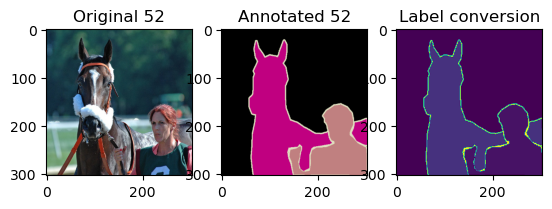

In [15]:
#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(training_data_anns))

f, axarr = plt.subplots(1,3)
axarr[0].imshow(training_data_imgs[image_number])
axarr[1].imshow(training_data_anns[image_number])
axarr[2].imshow(labels[image_number][:,:,0])
#axarr[1,1].imshow(image_rgb_matlab)
axarr[0].title.set_text('Original' + ' ' + str(image_number))
axarr[1].title.set_text('Annotated' + ' ' + str(image_number))
axarr[2].title.set_text('Label conversion')
#axarr[1,1].title.set_text('Matlab Prediction')
plt.show()

In [16]:
print(image_number)

52


In [17]:
#OneHotEncoder
n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data_imgs, labels_cat, test_size = 0.20, random_state = 42)

In [19]:
weights = [1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22, 1/22]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [20]:
IMG_HEIGHT

304

In [21]:
IMG_CHANNELS

3

In [22]:
from simple_multi_unet_model import multi_unet_model, jacard_coef  

metrics=['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 304, 304, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 304, 304, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 304, 304, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 304, 304, 16)         2320      ['dropout[0][0]']             
                                                                                           

                                                                                                  
 conv2d_14 (Conv2D)          (None, 152, 152, 32)         18464     ['concatenate_2[0][0]']       
                                                                                                  
 dropout_7 (Dropout)         (None, 152, 152, 32)         0         ['conv2d_14[0][0]']           
                                                                                                  
 conv2d_15 (Conv2D)          (None, 152, 152, 32)         9248      ['dropout_7[0][0]']           
                                                                                                  
 conv2d_transpose_3 (Conv2D  (None, 304, 304, 16)         2064      ['conv2d_15[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatena

In [23]:
#history1 = model.fit(X_train[0:1000], y_train[0:1000], 
history1 = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=10, # change to desired number of epochs
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/10


73/73 [==============================] - 324s 4s/step - loss: 1.0563 - accuracy: 0.5449 - jacard_coef: 0.2853 - val_loss: 1.0249 - val_accuracy: 0.7107 - val_jacard_coef: 0.0570
Epoch 2/10
73/73 [==============================] - 293s 4s/step - loss: 1.0144 - accuracy: 0.7001 - jacard_coef: 0.2211 - val_loss: 1.0114 - val_accuracy: 0.7133 - val_jacard_coef: 0.3128
Epoch 3/10
73/73 [==============================] - 290s 4s/step - loss: 1.0105 - accuracy: 0.7087 - jacard_coef: 0.2704 - val_loss: 1.0103 - val_accuracy: 0.7134 - val_jacard_coef: 0.3293
Epoch 4/10
73/73 [==============================] - 293s 4s/step - loss: 1.0099 - accuracy: 0.7095 - jacard_coef: 0.2826 - val_loss: 1.0100 - val_accuracy: 0.7134 - val_jacard_coef: 0.3412
Epoch 5/10
73/73 [==============================] - 290s 4s/step - loss: 1.0097 - accuracy: 0.7097 - jacard_coef: 0.2903 - val_loss: 1.0099 - val_accuracy: 0.7135 - val_jacard_coef: 0.3466
Epoch 6/10
73/73 [==============================] - 2

In [24]:
# Saving the model to the disk
model.save('Img_Seg_UNet_model_Pascal_Dataset')

INFO:tensorflow:Assets written to: Img_Seg_UNet_model_Pascal_Dataset\assets


INFO:tensorflow:Assets written to: Img_Seg_UNet_model_Pascal_Dataset\assets


In [25]:
def jacard_coef(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3]) - intersection
    return tf.reduce_mean((intersection + smooth) / (union + smooth), axis=0)

In [26]:
from tensorflow.keras.models import load_model

# Define the custom loss function
def dice_loss_plus_1focal_loss(y_true, y_pred):
    smooth = 1
    gamma=2.0
    alpha=0.25 
    dice_weight=1.0 
    focal_weight=1.0
    
    #dice coeff
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice_coeff = (2. * intersection + smooth) / (union + smooth)
    
    #dice loss
    dice_loss = 1 - dice_coeff(y_true, y_pred)
    
    #focal loss
    pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
    focal_loss = -alpha * tf.pow(1 - pt, gamma) * tf.math.log(pt + 1e-8)
    
    return dice_weight * dice_loss + focal_weight * focal_loss

# Register the custom loss function
with tf.keras.utils.custom_object_scope({'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss}, {"jacard_coef": jacard_coef} ):
    # Load the model
    segmentation_model = tf.keras.models.load_model('Img_Seg_UNet_model_Pascal_Dataset')

# Define custom object dictionary with the necessary custom objects
#custom_objects = {"jacard_coef": jacard_coef}


# Load the model, providing the custom_objects dictionary
#autoencoder_model = load_model('Img_Seg_model_031324', custom_objects=custom_objects)

# Using the Model to make Predictions
#autoencoder_model = tf.keras.models.load_model('Img_Seg_model_031324')

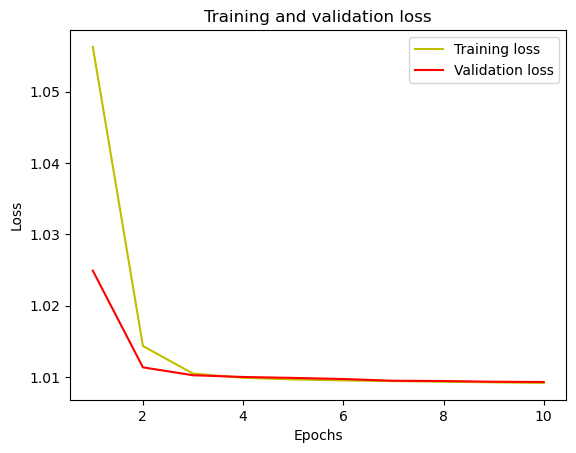

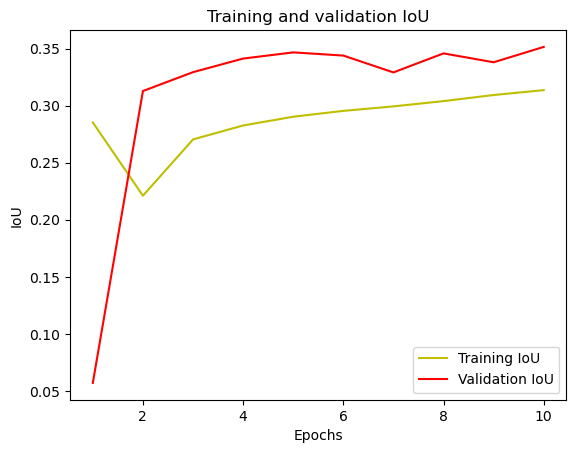

In [27]:
#plot the training and validation accuracy and loss at each epoch
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

